<a href="https://colab.research.google.com/github/Imran1hp/Machine-Learning/blob/main/Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --upgrade --quiet
!pip install plotly matplotlib seaborn --quiet
!pip install scikit-learn --quiet
!pip install numpy --quiet

In [ ]:
import opendatasets as od

In [ ]:
od.version()

'0.1.22'

In [ ]:
dataset_url ="https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package"

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imranlaskar123
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:00<00:00, 688MB/s]

In [ ]:
import os


In [ ]:
data_dir = './weather-dataset-rattle-package'

In [ ]:
os.listdir(data_dir)

['weatherAUS.csv']

In [ ]:
train_csv = data_dir +'/weatherAUS.csv'

In [ ]:
!pip install pandas --quiet

In [ ]:
import pandas as pd


In [ ]:
raw_df = pd.read_csv(train_csv)

In [ ]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
raw_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize'] =(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [ ]:
px.histogram(raw_df ,x='Location',title="Location vs rain",color="RainToday")

In [ ]:
px.histogram(raw_df,
             x="Temp3pm",
             title ="temperature at 3 pm vs. Rain Tomorrow",
             color="RainTomorrow")

In [ ]:
px.histogram(raw_df,
             x="RainTomorrow",
             title ="Rain Tomorrow vs Rain Today",
             color ="RainToday")

In [ ]:
px.scatter(raw_df.sample(2000),
           title='Min Temp. Vs Rain Today',
           x="MinTemp",
           y='MaxTemp',
           color="RainToday")

In [ ]:
px.strip(raw_df.sample(2000),
         title ="Temp(3 pm) vs. Humaidity(3 pm)",
         x="Temp3pm",
         y="Humidity3pm",
         color ="RainTomorrow")

In [ ]:
use_sample =False

In [ ]:
sample_fraction =0.1

In [ ]:
if use_sample:
  raw_df =raw_df.sample(frac=sample_fraction).copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# we are not gonna useing this method for now
tarin_val_df, test_df = train_test_split(raw_df,test_size =0.2,random_state=42)
tarin__df,val_df =train_test_split(tarin_val_df,test_size=0.25,random_state=42)

In [ ]:
print("train_df.shape",tarin__df.shape)
print("val_df.shape",val_df.shape)
print("test_df.shape",test_df.shape)

train_df.shape (84471, 23)
val_df.shape (28158, 23)
test_df.shape (28158, 23)


<Axes: title={'center': 'no. of Row per Year '}, xlabel='Date', ylabel='count'>

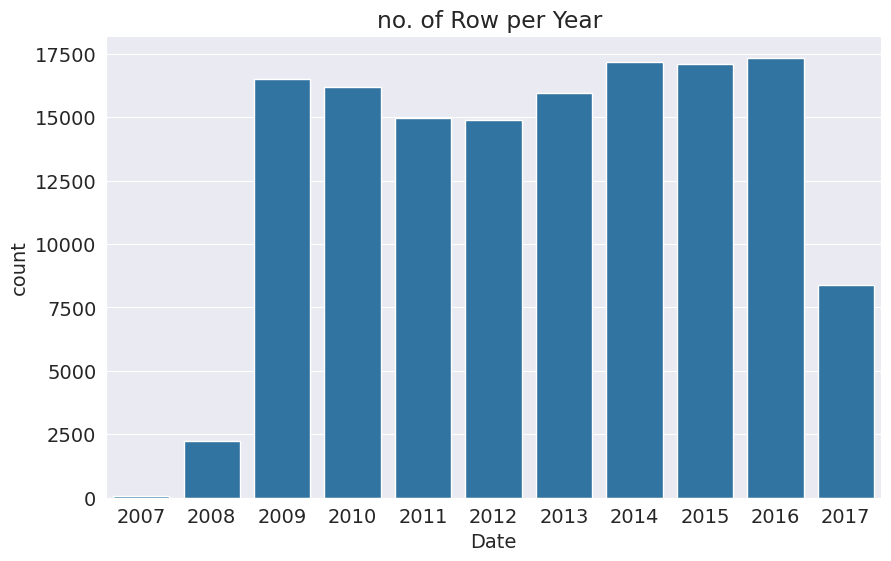

In [ ]:
plt.title('no. of Row per Year ')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year<2015]
val_df =raw_df[year==2015]
test_df = raw_df[year>2015]

In [ ]:
print("train_df.shape",tarin__df.shape)
print("val_df.shape",val_df.shape)
print("test_df.shape",test_df.shape)

train_df.shape (84471, 23)
val_df.shape (17089, 23)
test_df.shape (25710, 23)


In [ ]:
train_df

In [ ]:
val_df

In [ ]:
test_df

In [ ]:
input_cols =list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [ ]:
print(input_cols)
print(target_col)

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = val_df[[target_col]].copy()

In [68]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,...,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,...,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,...,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,...,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No


In [ ]:
train_targets

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets =test_df[target_col].copy()

In [ ]:
import numpy as np

In [ ]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
numerical_cols

In [ ]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
train_inputs[numerical_cols].describe()

In [ ]:
train_inputs[categorical_cols].nunique()

In [ ]:
from sklearn.impute import SimpleImputer

In [64]:
?SimpleImputer

In [65]:
imputer = SimpleImputer(strategy ='mean')

In [66]:
raw_df[numerical_cols].isna().sum()

,0
MinTemp,468
MaxTemp,307
Rainfall,0
Evaporation,59694
Sunshine,66805
WindGustSpeed,9105
WindSpeed9am,1055
WindSpeed3pm,2531
Humidity9am,1517
Humidity3pm,3501


In [67]:
train_inputs[numerical_cols].isna().sum()

,0
MinTemp,314
MaxTemp,187
Rainfall,0
Evaporation,36331
Sunshine,40046
WindGustSpeed,6828
WindSpeed9am,874
WindSpeed3pm,1069
Humidity9am,1052
Humidity3pm,1116


In [70]:
imputer.fit(raw_df[numerical_cols])

SimpleImputer()

In [71]:
list(imputer.statistics_)

[np.float64(12.18482386562048),
 np.float64(23.235120301822324),
 np.float64(2.349974074310839),
 np.float64(5.472515506887154),
 np.float64(7.630539861047281),
 np.float64(39.97051988882308),
 np.float64(13.990496092519967),
 np.float64(18.631140782316862),
 np.float64(68.82683277087672),
 np.float64(51.44928834695453),
 np.float64(1017.6545771543717),
 np.float64(1015.2579625879797),
 np.float64(4.431160817585808),
 np.float64(4.499250233195188),
 np.float64(16.98706638787991),
 np.float64(21.69318269001107)]

In [74]:
train_inputs[numerical_cols]=imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=imputer.transform(test_inputs[numerical_cols])

In [75]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,5.472516,7.63054,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,No
1,Albury,7.4,25.1,0.0,5.472516,7.63054,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,No
2,Albury,12.9,25.7,0.0,5.472516,7.63054,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,No
3,Albury,9.2,28.0,0.0,5.472516,7.63054,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,No
4,Albury,17.5,32.3,1.0,5.472516,7.63054,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,5.472516,7.63054,SSE,43.0,ESE,SSE,...,26.0,22.0,13.0,1014.1,1009.8,4.431161,4.49925,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,5.472516,7.63054,NE,31.0,ENE,SW,...,20.0,16.0,8.0,1012.6,1007.6,4.431161,4.49925,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,5.472516,7.63054,ESE,39.0,ESE,SSE,...,9.0,15.0,8.0,1011.9,1008.0,4.431161,4.49925,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,5.472516,7.63054,ESE,43.0,ESE,SSW,...,17.0,22.0,9.0,1014.0,1009.2,4.431161,4.49925,29.8,37.2,No


In [ ]:
train_inputs[numerical_cols].isna().sum()